In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import geopandas
from scipy import stats
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
pd.options.display.max_columns = 100

In [3]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [4]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [5]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [6]:
df_usa = geopandas.read_file('states.shp')
print(df_usa.shape)

df_usa.head(2)

(51, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [7]:
df_usa_c = df_usa[(df_usa['STATE_NAME'] == 'Alabama') | (df_usa['STATE_NAME'] == 'Connecticut') | 
                  (df_usa['STATE_NAME'] == 'Delaware') | (df_usa['STATE_NAME'] == 'Florida') | 
                  (df_usa['STATE_NAME'] == 'Georgia') | (df_usa['STATE_NAME'] == 'Illinois') | 
                  (df_usa['STATE_NAME'] == 'Indiana') | (df_usa['STATE_NAME'] == 'Kentucky') | 
                  (df_usa['STATE_NAME'] == 'Maine') | (df_usa['STATE_NAME'] == 'Maryland') | 
                  (df_usa['STATE_NAME'] == 'Massachusetts') | (df_usa['STATE_NAME'] == 'Michigan') | 
                  (df_usa['STATE_NAME'] == 'Missouri') | (df_usa['STATE_NAME'] == 'New Hampshire') | 
                  (df_usa['STATE_NAME'] == 'New Jersey') | (df_usa['STATE_NAME'] == 'New York') | 
                  (df_usa['STATE_NAME'] == 'North Carolina') | (df_usa['STATE_NAME'] == 'Ohio') | 
                  (df_usa['STATE_NAME'] == 'Pennsylvania') | (df_usa['STATE_NAME'] == 'Rhode Island') | 
                  (df_usa['STATE_NAME'] == 'South Carolina') | (df_usa['STATE_NAME'] == 'Tennessee') | 
                  (df_usa['STATE_NAME'] == 'Vermont') | (df_usa['STATE_NAME'] == 'Virginia') | 
                  (df_usa['STATE_NAME'] == 'West Virginia') | (df_usa['STATE_NAME'] == 'Wisconsin')]

df_usa_c = df_usa_c.reset_index(drop=True)

print(df_usa_c.shape)

df_usa_c.head(2)

(26, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
1,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."


In [8]:
# Per species:
# Day ~ Temperature + (Temperature | Cell)

In [9]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [10]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients/'

os.chdir(path)

In [11]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [12]:
filename = 'coefficients_mean_arrival_day_temperature.csv'

df_coeffs = pd.read_csv(filename)
print(df_coeffs.shape)

df_coeffs.head(2)

(450, 4)


,species,cell,slope,intercept
0,Antrostomus_carolinensis,19,-1.749315,101.853281
1,Antrostomus_carolinensis,45,-0.959714,105.110310


In [13]:
df_coeffs = df_coeffs.rename(columns={'species': 'scientific_name'})

df_coeffs['scientific_name'] = df_coeffs['scientific_name'].str.replace('_', ' ')

print(df_coeffs.shape)

df_coeffs.head(2)

(450, 4)


,scientific_name,cell,slope,intercept
0,Antrostomus carolinensis,19,-1.749315,101.853281
1,Antrostomus carolinensis,45,-0.959714,105.110310


In [14]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [15]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [16]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [17]:
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_common_names = pd.read_csv(filename)
print(df_common_names.shape)

df_common_names.head(2)

(19, 26)


,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [18]:
df_common_names = df_common_names[['scientific_name', 'common_name']]
print(df_common_names.shape)

df_common_names.head(2)

(19, 2)


,scientific_name,common_name
0,Aeronautes saxatalis,White-throated Swift
1,Antrostomus carolinensis,Chuck-will's-widow


In [19]:
filename = 'temperatures_all_cells_all_years_prepared.csv'

df_lat_lon = pd.read_csv(filename)
print(df_lat_lon.shape)

df_lat_lon.head(2)

(3276, 5)


,cell,lat,lon,year,air_temp_degrees_celsius
0,0,24.0,-92.0,2002,21.104356
1,0,24.0,-92.0,2003,20.477635


In [20]:
df_lat_lon = df_lat_lon[['cell', 'lat', 'lon']].drop_duplicates()
print(df_lat_lon.shape)

df_lat_lon.head(2)

(182, 3)


,cell,lat,lon
0,0,24.0,-92.0
18,1,24.0,-90.0


In [21]:
df_coeffs = df_coeffs.merge(df_lat_lon, on=['cell'])
print(df_coeffs.shape)

df_coeffs.head(2)

(450, 6)


,scientific_name,cell,slope,intercept,lat,lon
0,Antrostomus carolinensis,19,-1.749315,101.853281,26.0,-82.0
1,Chaetura pelagica,19,-0.277597,107.545694,26.0,-82.0


In [22]:
df_coeffs = df_coeffs.merge(df_common_names, on=['scientific_name'])
print(df_coeffs.shape)

df_coeffs.head(2)

(450, 7)


,scientific_name,cell,slope,intercept,lat,lon,common_name
0,Antrostomus carolinensis,19,-1.749315,101.853281,26.0,-82.0,Chuck-will's-widow
1,Antrostomus carolinensis,45,-0.959714,105.110310,30.0,-86.0,Chuck-will's-widow


In [23]:
list_sci_names = sorted(df_coeffs['scientific_name'].unique())
print(len(list_sci_names))

10


In [88]:
list_sci_names

['Antrostomus carolinensis',
 'Antrostomus vociferus',
 'Chaetura pelagica',
 'Chordeiles minor',
 'Hirundo rustica',
 'Petrochelidon pyrrhonota',
 'Progne subis',
 'Riparia riparia',
 'Stelgidopteryx serripennis',
 'Tachycineta bicolor']

In [24]:
print(df_coeffs['slope'].min())
print(df_coeffs['slope'].max())

-1.74931474675599
1.06180419178181


Antrostomus carolinensis
(21, 7)
(21, 8)
[9.52 4.76]
Antrostomus vociferus
(24, 7)
(24, 8)
[9.52 4.76]
Chaetura pelagica
(70, 7)
(70, 8)
[9.52 4.76]
Chordeiles minor
(36, 7)
(36, 8)
[9.52 4.76]
Hirundo rustica
(73, 7)
(73, 8)
[9.52 4.76]
Petrochelidon pyrrhonota
(43, 7)
(43, 8)
[9.52 4.76]
Progne subis
(35, 7)
(35, 8)
[9.52 4.76]
Riparia riparia
(29, 7)
(29, 8)
[9.52 4.76]
Stelgidopteryx serripennis
(65, 7)
(65, 8)
[9.52 4.76]
Tachycineta bicolor
(54, 7)
(54, 8)
[9.52 4.76]


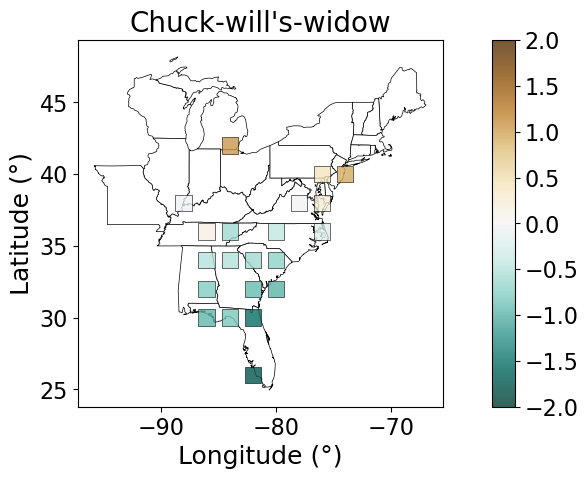

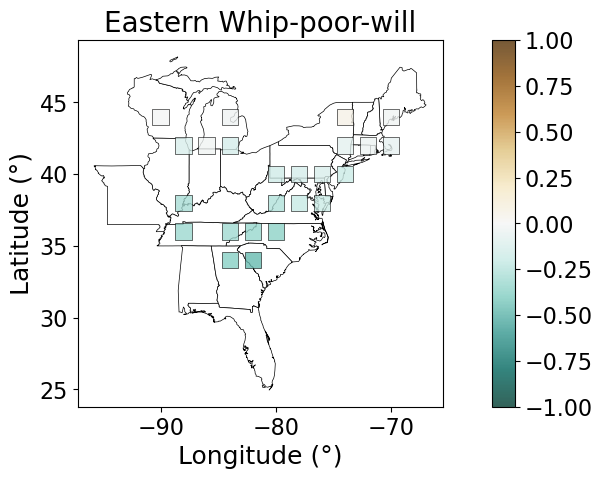

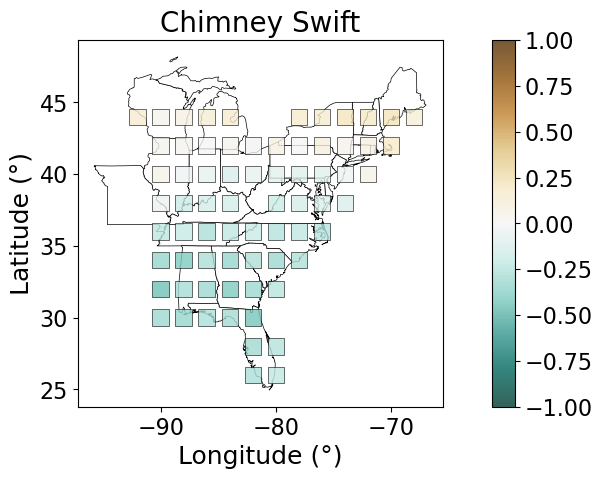

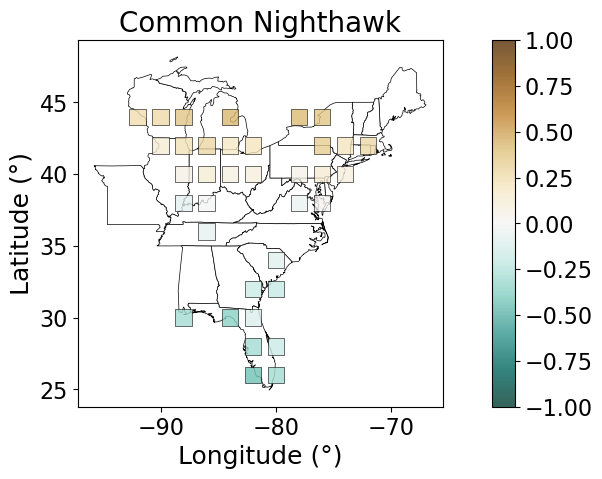

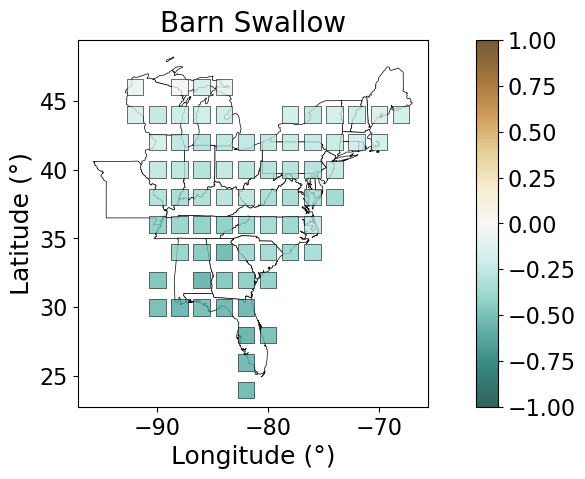

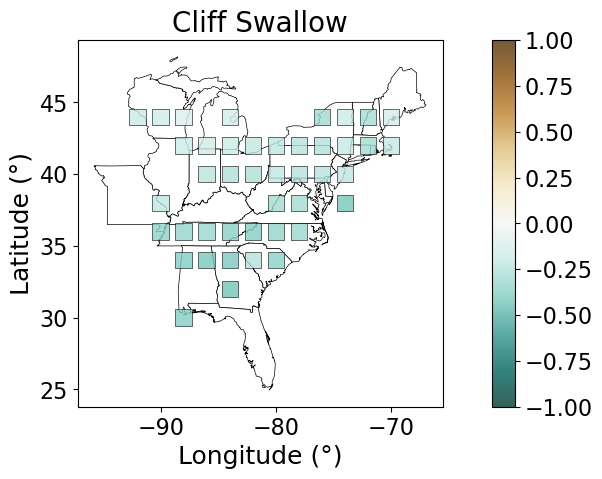

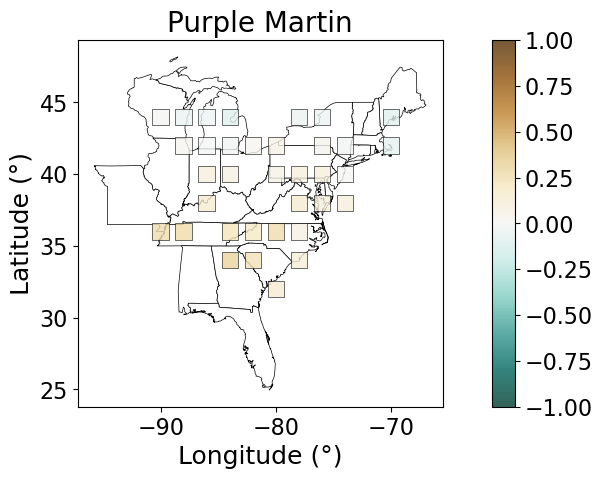

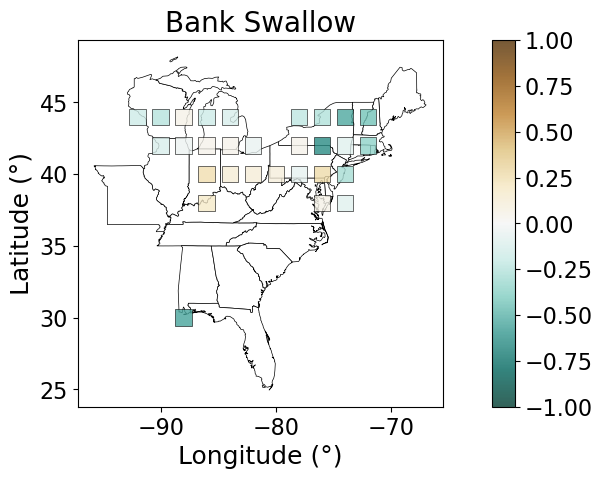

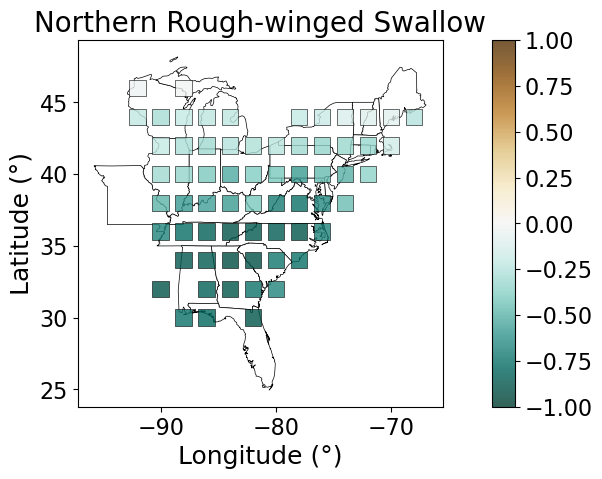

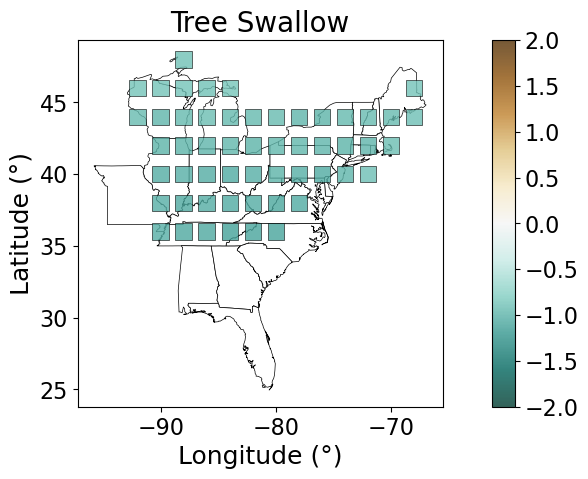

In [87]:
for i in range(len(list_sci_names)):
    
    print(list_sci_names[i])

    df_species = df_coeffs[df_coeffs['scientific_name'] == list_sci_names[i]]
    print(df_species.shape)
    
#     print(df_species.head(2))
    
    common_name = df_species['common_name'].unique()[0]
    
    # print(df_species['slope'].min())
    # print(np.floor(df_species['slope'].min()))
    # print(df_species['slope'].max())
    # print(np.ceil(df_species['slope'].max()))

    abs_floor_min_slope = np.absolute(np.floor(df_species['slope'].min()))
    # print(abs_floor_min_slope)

    abs_ceil_max_slope = np.absolute(np.ceil(df_species['slope'].max()))
    # print(abs_ceil_max_slope)

    greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
    # print(greatest_abs)

    v_min = -greatest_abs

    v_max = greatest_abs
    
#     v_min = -1.75
    
#     v_max = 1.75
    
    norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
    
    df_g = geopandas.GeoDataFrame(df_species, geometry=geopandas.points_from_xy(df_species['lon'], 
                                                                            df_species['lat']))
    print(df_g.shape)

    df_g.head(2)
    
#     fig, ax = plt.subplots()
    
    fig, ax = plt.subplots(figsize=(4.76*2, 4.76))

    first_plot = df_usa_c.plot(color='white', edgecolor='black', lw=0.5, ax=ax)

    second_plot = ax.scatter('lon', 'lat', s=140, c='slope', alpha=0.8, cmap='BrBG_r', data=df_g, 
                     norm=norm, edgecolor='black', marker='s', linewidths=0.5)

    divider = make_axes_locatable(ax)
    
    plt.tick_params(labelsize=16)

    #
    cax = divider.append_axes('right', size='5%', pad=0.05)

#     cbar = fig.colorbar(second_plot, cax=cax, label='Sensitivity (Julian days/°C)')
    
    cbar = fig.colorbar(second_plot, cax=cax)
    
    cbar.ax.tick_params(labelsize=16)
    
#     plt.title('Sensitivity (Julian days/°C)', fontsize=18, ha='left')
    
#     plt.annotate('', xy=(5, 0), xycoords='axes fraction', xytext=(5, 1), 
#         arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))
    
#     plt.annotate('More sensitive', xy=(5.5, -0.05), xycoords='axes fraction', xytext=(5.5, -0.05), 
#          ha='left', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

#     plt.annotate('Less sensitive', xy=(5.5, 1.05), xycoords='axes fraction', xytext=(5.5, 1.05), ha='left', 
#          color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

    ax.set_title(common_name, fontsize=20)
    
    ax.set_xlabel('Longitude (°)', fontsize=18)

    ax.set_ylabel('Latitude (°)', fontsize=18)
    
#     plt.tight_layout()
    
    print(fig.get_size_inches())
    
    plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/map_sensitivity/' + common_name + '.pdf', 
                bbox_inches='tight')

In [26]:
plt.rcParams["lines.linewidth"]

1.5

In [27]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [28]:
# Per species:
# Temperature ~ Year + (Year | Cell)
# Range of years?

In [29]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/temperature_year/coefficients/'

os.chdir(path)

In [30]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/temperature_year/coefficients'

In [31]:
filename = 'coefficients_temperature_year.csv'

df_temp_change = pd.read_csv(filename)

print(df_temp_change.shape)

df_temp_change.head(2)

(182, 3)


,cell,slope,intercept
0,0,0.038108,-55.566823
1,1,0.038259,-55.527943


In [32]:
df_temp_change = df_temp_change.merge(df_lat_lon, on=['cell'])
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 5)


,cell,slope,intercept,lat,lon
0,0,0.038108,-55.566823,24.0,-92.0
1,1,0.038259,-55.527943,24.0,-90.0


(182, 6)


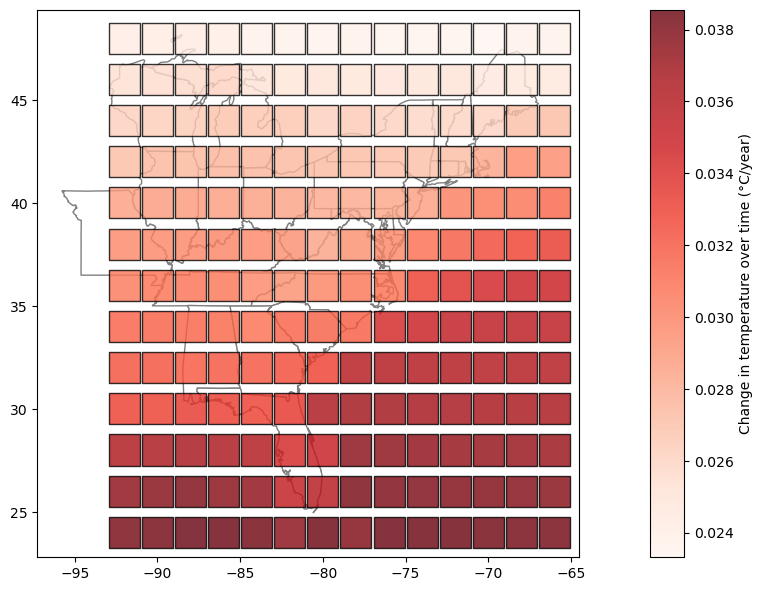

In [33]:
# # print(df_temp_change['slope'].min())
# # print(np.floor(df_temp_change['slope'].min()))
# # print(df_temp_change['slope'].max())
# # print(np.ceil(df_temp_change['slope'].max()))

# abs_floor_min_slope = np.absolute(np.floor(df_temp_change['slope'].min()))
# # print(abs_floor_min_slope)

# abs_ceil_max_slope = np.absolute(np.ceil(df_temp_change['slope'].max()))
# # print(abs_ceil_max_slope)

# greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
# # print(greatest_abs)

# v_min = -greatest_abs

# v_max = greatest_abs

# norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

df_g = geopandas.GeoDataFrame(df_temp_change, geometry=geopandas.points_from_xy(df_temp_change['lon'], 
                                                                                df_temp_change['lat']))
print(df_g.shape)

df_g.head(2)

fig, ax = plt.subplots(figsize=(4.6*2, 4.6*2))

first_plot = df_usa_c.plot(color='white', edgecolor='gray', ax=ax)

# second_plot = ax.scatter('lon', 'lat', s=500, c='slope', alpha=0.8, cmap='RdBu', data=df_g, 
#                  norm=norm, edgecolor='black', marker='s')

second_plot = ax.scatter('lon', 'lat', s=500, c='slope', alpha=0.8, cmap='Reds', data=df_g, 
                         edgecolor='black', marker='s')

# RdBu_r

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = fig.colorbar(second_plot, cax=cax, label='Change in temperature over time (°C/year)')

# plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/map_temperature_year.pdf')

In [34]:
# Per cell:
# Temperature ~ Year

In [35]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [36]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [37]:
filename = 'betas_temperature_year_ols.csv'

df_temp_change = pd.read_csv(filename)
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 8)


,cell,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469


In [38]:
df_temp_change = df_temp_change.merge(df_lat_lon, on=['cell'])
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 10)


,cell,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,lat,lon
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049,24.0,-92.0
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469,24.0,-90.0


In [39]:
df_temp_change = df_temp_change.rename(columns={'slope_temp_change_all_years': 'slope'})
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 10)


,cell,slope,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,lat,lon
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049,24.0,-92.0
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469,24.0,-90.0


In [40]:
df_temp_change['column_name'] = 0
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 11)


,cell,slope,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,lat,lon,column_name
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049,24.0,-92.0,0
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469,24.0,-90.0,0


(182, 12)


Text(0.5, 1.0, 'Change in temperature between 2002 and 2019 (°C/year)')

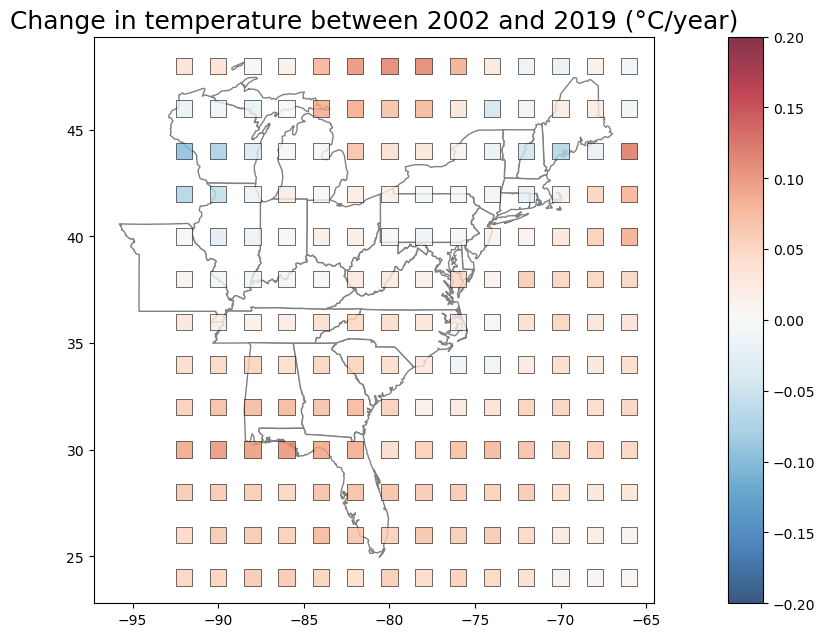

In [62]:
# # print(df_temp_change['slope'].min())
# # print(np.floor(df_temp_change['slope'].min()))
# # print(df_temp_change['slope'].max())
# # print(np.ceil(df_temp_change['slope'].max()))

# # abs_floor_min_slope = np.absolute(np.floor(df_temp_change['slope'].min()))
# # print(abs_floor_min_slope)

# # abs_ceil_max_slope = np.absolute(np.ceil(df_temp_change['slope'].max()))
# # print(abs_ceil_max_slope)

# # greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
# # # print(greatest_abs)

# # v_min = -greatest_abs

# v_min = -0.2

# # v_max = greatest_abs

# v_max = 0.2

# norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

# df_g = geopandas.GeoDataFrame(df_temp_change, geometry=geopandas.points_from_xy(df_temp_change['lon'], 
#                                                                                 df_temp_change['lat']))
# print(df_g.shape)

# df_g.head(2)

# fig, ax = plt.subplots(figsize=(4.76*2, 4.76*2))

# first_plot = df_usa_c.plot(color='white', edgecolor='gray', ax=ax)

# second_plot = ax.scatter('lon', 'lat', s=140, c='slope', alpha=0.8, cmap='RdBu_r', data=df_g, 
#                          norm=norm, edgecolor='black', marker='s', linewidths=0.5)


# # RdBu_r

# divider = make_axes_locatable(ax)

# cax = divider.append_axes("right", size="5%", pad=0.05)

# cbar = fig.colorbar(second_plot, cax=cax)

# # label='Change in temperature between 2002 and 2019\n(°C/year)'

# ax.set_title('Change in temperature between 2002 and 2019 (°C/year)', fontsize=18)

# # plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/map_temperature_year.pdf')

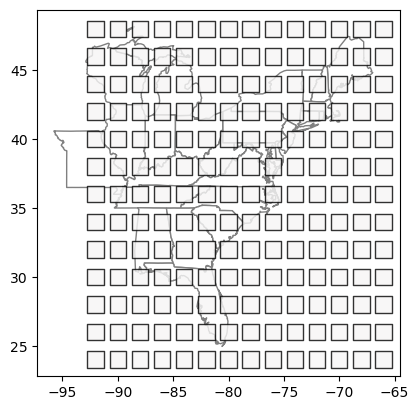

In [47]:
# print(df_temp_change['slope'].min())
# print(np.floor(df_temp_change['slope'].min()))
# print(df_temp_change['slope'].max())
# print(np.ceil(df_temp_change['slope'].max()))

# abs_floor_min_slope = np.absolute(np.floor(df_temp_change['slope'].min()))
# print(abs_floor_min_slope)

# abs_ceil_max_slope = np.absolute(np.ceil(df_temp_change['slope'].max()))
# print(abs_ceil_max_slope)

# greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
# # print(greatest_abs)

# v_min = -greatest_abs

v_min = -0.2

# v_max = greatest_abs

v_max = 0.2

norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

df_g = geopandas.GeoDataFrame(df_temp_change, geometry=geopandas.points_from_xy(df_temp_change['lon'], 
                                                                                df_temp_change['lat']))
# print(df_g.shape)

# df_g.head(2)

fig, ax = plt.subplots(figsize=(4.76, 4.76))

first_plot = df_usa_c.plot(color='white', edgecolor='gray', ax=ax)

second_plot = ax.scatter('lon', 'lat', s=140, c='column_name', alpha=0.8, cmap='RdBu_r', data=df_g, 
                 norm=norm, edgecolor='black', marker='s')

# RdBu_r

# divider = make_axes_locatable(ax)

# cax = divider.append_axes("right", size="5%", pad=0.05)

# cbar = fig.colorbar(second_plot, cax=cax, label='Change in temperature between 2002 and 2019\n(°C/year)')

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/grid.pdf')

In [43]:
# Barn Swallow

In [44]:
example_species_name = 'Barn Swallow'

df_example_species = df_coeffs[df_coeffs['common_name'] == example_species_name]
print(df_example_species.shape)

df_example_species.head(2)

(73, 7)


,scientific_name,cell,slope,intercept,lat,lon,common_name
127,Hirundo rustica,19,-0.522568,91.003673,26.0,-82.0,Barn Swallow
128,Hirundo rustica,45,-0.496331,92.902642,30.0,-86.0,Barn Swallow


In [45]:
df_temp_change_example = df_temp_change.merge(df_example_species[['cell', 'lat', 'lon']], on=['cell', 'lat', 'lon'])
print(df_temp_change_example.shape)

df_temp_change_example.head(2)

(73, 11)


,cell,slope,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,lat,lon,column_name
0,5,0.040598,0.039059,-61.762675,0.314067,0.063252,-0.042203,0.123400,24.0,-82.0,0
1,19,0.060397,0.062364,-106.612850,0.347229,0.055373,-0.071809,0.192604,26.0,-82.0,0


(73, 12)


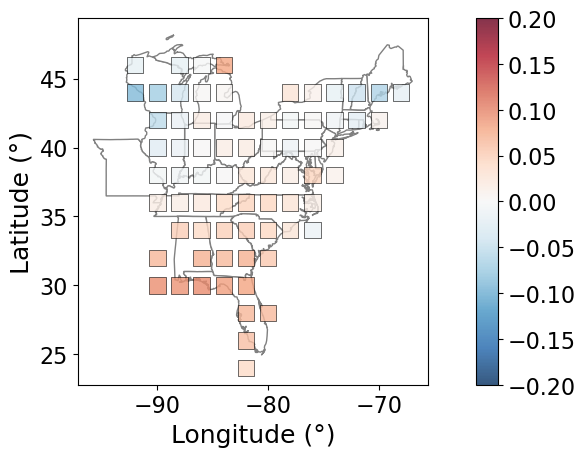

In [83]:
# print(df_temp_change['slope'].min())
# print(np.floor(df_temp_change['slope'].min()))
# print(df_temp_change['slope'].max())
# print(np.ceil(df_temp_change['slope'].max()))

# abs_floor_min_slope = np.absolute(np.floor(df_temp_change['slope'].min()))
# print(abs_floor_min_slope)

# abs_ceil_max_slope = np.absolute(np.ceil(df_temp_change['slope'].max()))
# print(abs_ceil_max_slope)

# greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
# # print(greatest_abs)

# v_min = -greatest_abs

v_min = -0.2

# v_max = greatest_abs

v_max = 0.2

norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

df_g = geopandas.GeoDataFrame(df_temp_change_example, geometry=geopandas.points_from_xy(df_temp_change_example['lon'], 
                                                                                df_temp_change_example['lat']))
print(df_g.shape)

df_g.head(2)

fig, ax = plt.subplots(figsize=(4.76*2, 4.76))

first_plot = df_usa_c.plot(color='white', edgecolor='gray', ax=ax)

second_plot = ax.scatter('lon', 'lat', s=140, c='slope', alpha=0.8, cmap='RdBu_r', data=df_g, 
                 norm=norm, edgecolor='black', marker='s', linewidths=0.5)

# RdBu_r

plt.tick_params(labelsize=16)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = fig.colorbar(second_plot, cax=cax) # label='Air temperature change between 2002 and 2019 (°C/year)'

cbar.ax.tick_params(labelsize=16)

# plt.annotate('', xy=(5, 0), xycoords='axes fraction', xytext=(5, 1), 
#     arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

# plt.annotate('Cooler', xy=(5.5, -0.05), xycoords='axes fraction', xytext=(5.5, -0.05), 
#              ha='left', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

# plt.annotate('Warmer', xy=(5.5, 1.05), xycoords='axes fraction', xytext=(5.5, 1.05), ha='left', 
#              color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

# ax.set_title('Air temperature change between 2002 and 2019 (°C/year)\n', fontsize=18)

ax.set_xlabel('Longitude (°)', fontsize=18)

ax.set_ylabel('Latitude (°)', fontsize=18)

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/map_temperature_year_' + example_species_name + '.pdf', bbox_inches='tight')

(73, 12)


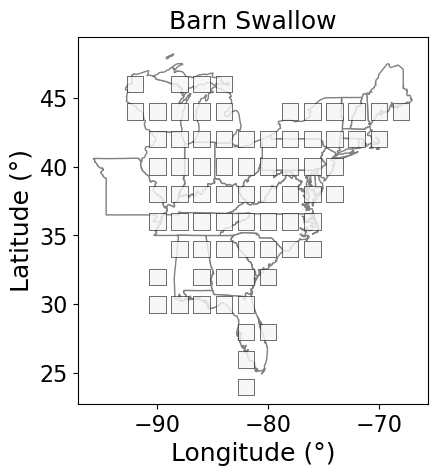

In [69]:
# print(df_temp_change['slope'].min())
# print(np.floor(df_temp_change['slope'].min()))
# print(df_temp_change['slope'].max())
# print(np.ceil(df_temp_change['slope'].max()))

# abs_floor_min_slope = np.absolute(np.floor(df_temp_change['slope'].min()))
# print(abs_floor_min_slope)

# abs_ceil_max_slope = np.absolute(np.ceil(df_temp_change['slope'].max()))
# print(abs_ceil_max_slope)

# greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])
# # print(greatest_abs)

# v_min = -greatest_abs

v_min = -0.2

# v_max = greatest_abs

v_max = 0.2

norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

df_g = geopandas.GeoDataFrame(df_temp_change_example, geometry=geopandas.points_from_xy(df_temp_change_example['lon'], 
                                                                                df_temp_change_example['lat']))
print(df_g.shape)

df_g.head(2)

fig, ax = plt.subplots(figsize=(4.76, 4.76))

first_plot = df_usa_c.plot(color='white', edgecolor='gray', ax=ax)

second_plot = ax.scatter('lon', 'lat', s=140, c='column_name', alpha=0.8, cmap='RdBu_r', data=df_g, 
                 norm=norm, edgecolor='black', marker='s', linewidths=0.5)

# RdBu_r

plt.tick_params(labelsize=16)

ax.set_title('Barn Swallow', fontsize=18)

ax.set_xlabel('Longitude (°)', fontsize=18)

ax.set_ylabel('Latitude (°)', fontsize=18)

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/map_' + example_species_name + '.pdf', bbox_inches='tight')